In [132]:
import pandas as pd 
import numpy as np
import folium
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import Imputer
import seaborn as sns
import statsmodels.api as sm
sns.set(style = "white")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')
from folium import plugins
from folium.plugins import HeatMap
import os
import json
import requests
import branca
import pandas_profiling as ppf

In [2]:
g_df = pd.read_csv('health-facilities-gh.csv')
print("Shape is: ", g_df.shape)
print("------------------------------------------------")
print(g_df.head())
print("------------------------------------------------")
print(g_df.info())

Shape is:  (3756, 8)
------------------------------------------------
    Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude  
0      Afrancho        CHAG   7.40801   -1.96317  
1  Anwiankwanta     Private   6.46312   -1.58592  
2   Aboabo No 2  Government   6.22393   -1.34982  
3     Aboabogya  Government   6.84177   -1.61098  
4        Aboaso  Government   6.84177   -1.61098  
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
Region          3756 non-null object

In [3]:
t_df = pd.read_csv('health-facility-tiers.csv')
print("Shape is: ", t_df.shape)
print("------------------------------------------------")
print(t_df.head())
print("------------------------------------------------")
print(t_df.info())

Shape is:  (1475, 3)
------------------------------------------------
    Region                   Facility  Tier
0  Ashanti    PEACE AND LOVE HOSPITAL     2
1  Ashanti             TODAH HOSPITAL     2
2  Ashanti  ASOKWA CHILREN'S HOSPITAL     2
3  Ashanti       FANKYEBEBRA HOSPITAL     2
4  Ashanti           MICHMIT HOSPITAL     2
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 3 columns):
Region      1475 non-null object
Facility    1475 non-null object
Tier        1475 non-null int64
dtypes: int64(1), object(2)
memory usage: 34.6+ KB
None


In [4]:
health_facilities= g_df.groupby(['Type']).size()

In [5]:
health_facilities= health_facilities.reset_index(name='Total_facilities')

# what facilities are most available

Text(0.5, 1.0, 'Facilities Type')

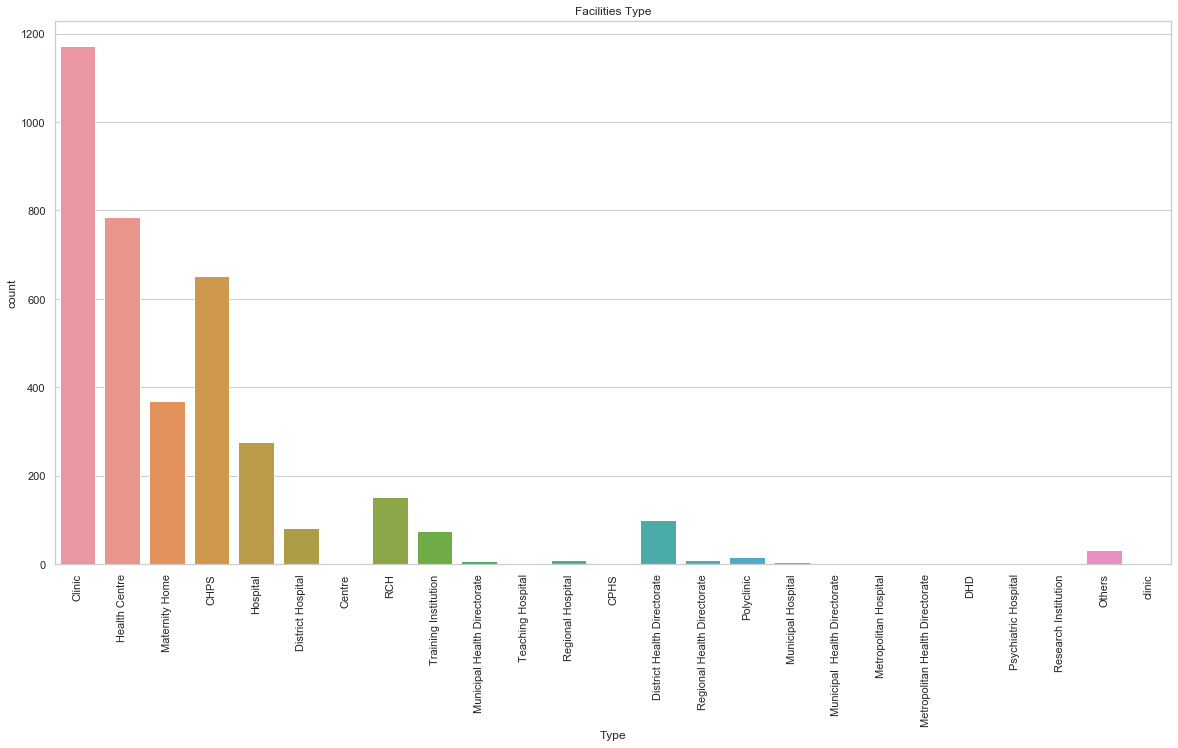

In [6]:
plt.figure(figsize=(20, 10))
p = sns.countplot(g_df['Type'])
# p.set_xticklabels(rotation=30)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.title('Facilities Type')

# which ownership is most expactable

Text(0.5, 1.0, 'Facilities Type')

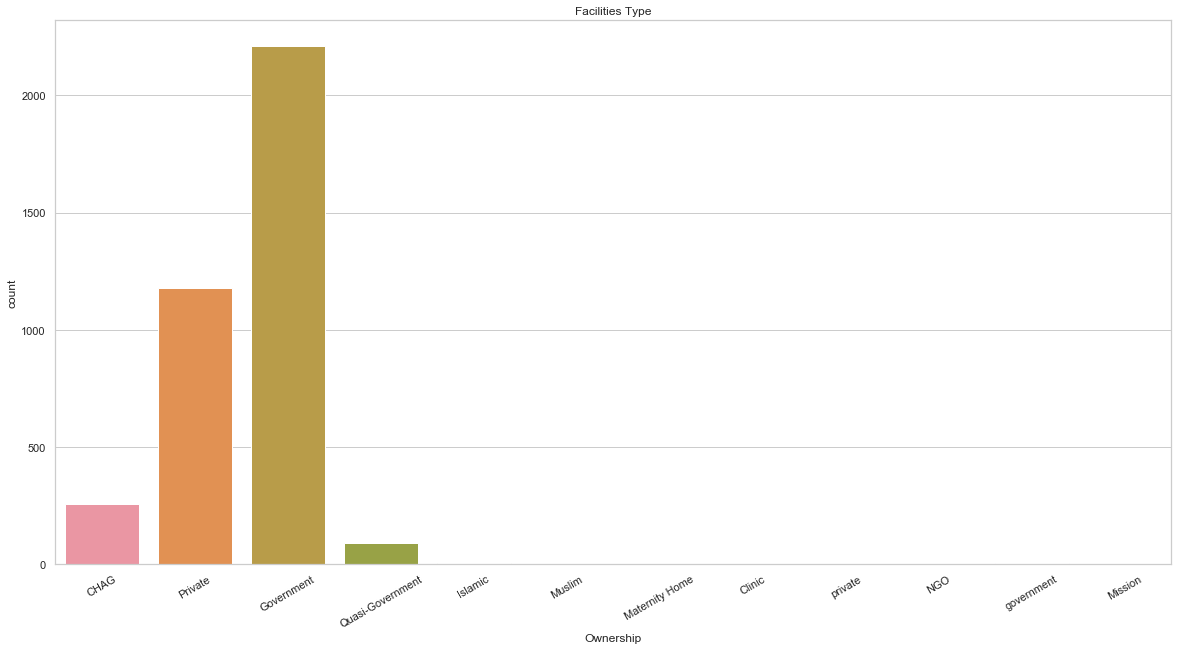

In [27]:
plt.figure(figsize=(20, 10))
p = sns.countplot(g_df['Ownership'])
# p.set_xticklabels(rotation=30)
p.set_xticklabels(p.get_xticklabels(), rotation=30)
plt.title('Facilities Type')

# which type of facilities more spreaded based on Facility types

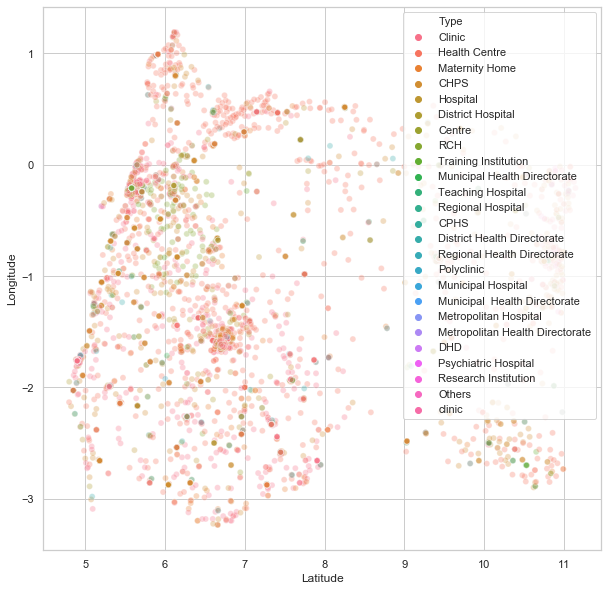

In [17]:
plt.figure(figsize=(10, 10))
p = sns.scatterplot(x='Latitude', y='Longitude', hue='Type', alpha=0.30, data=g_df)

# which region contains more facilities types

In [4]:
facilities_region_type= g_df.groupby('Region').apply(lambda x: len(x.Type)) 
facilities_region_type= facilities_region_type.reset_index(name= 'total_types')
facilities_region_type


,Region,total_types
0,Ashanti,658
1,Brong Ahafo,348
2,Central,299
3,Eastern,393
4,Greater Accra,504
5,Northern,267
6,Upper East,232
7,Upper West,161
8,Volta,398
9,Western,496


Text(0.5, 1.0, 'Facilities Type')

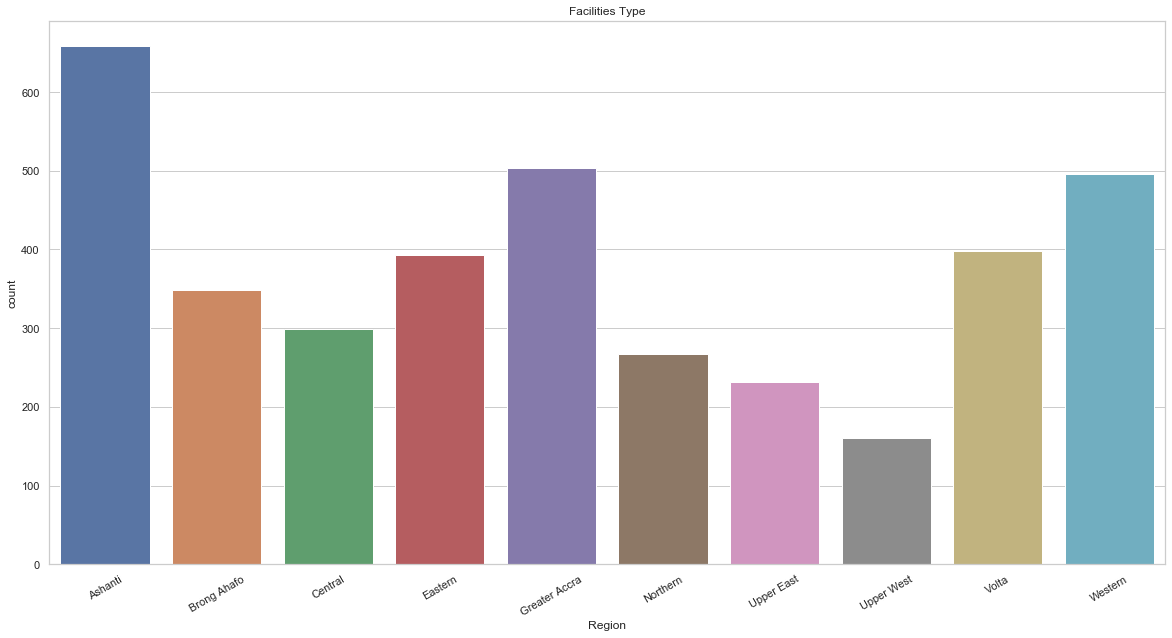

In [42]:
plt.figure(figsize=(20, 10))
p = sns.countplot(g_df['Region'])
# p.set_xticklabels(rotation=30)
p.set_xticklabels(p.get_xticklabels(), rotation=30)
plt.title('Facilities Type')

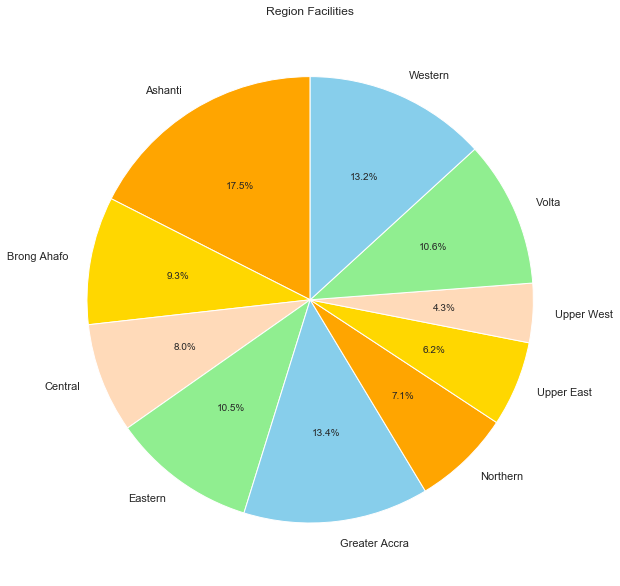

In [5]:
plt.figure(figsize=(10,20))
colors=['orange','gold','peachpuff','lightgreen','skyblue']
plt.pie(facilities_region_type.total_types, labels=facilities_region_type.Region, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Region Facilities')
plt.show()

In [37]:
District_Type = g_df.groupby(['District']).apply(lambda x: len(x.Type))
District_Type= District_Type.reset_index(name= 'Total_facilities')
District_Type[District_Type.Total_facilities > 200]

,District,Total_facilities
1,Accra Metropolitan,277
91,Kumasi Metropolitan,263


Text(0.5, 1.0, 'Facilities Type')

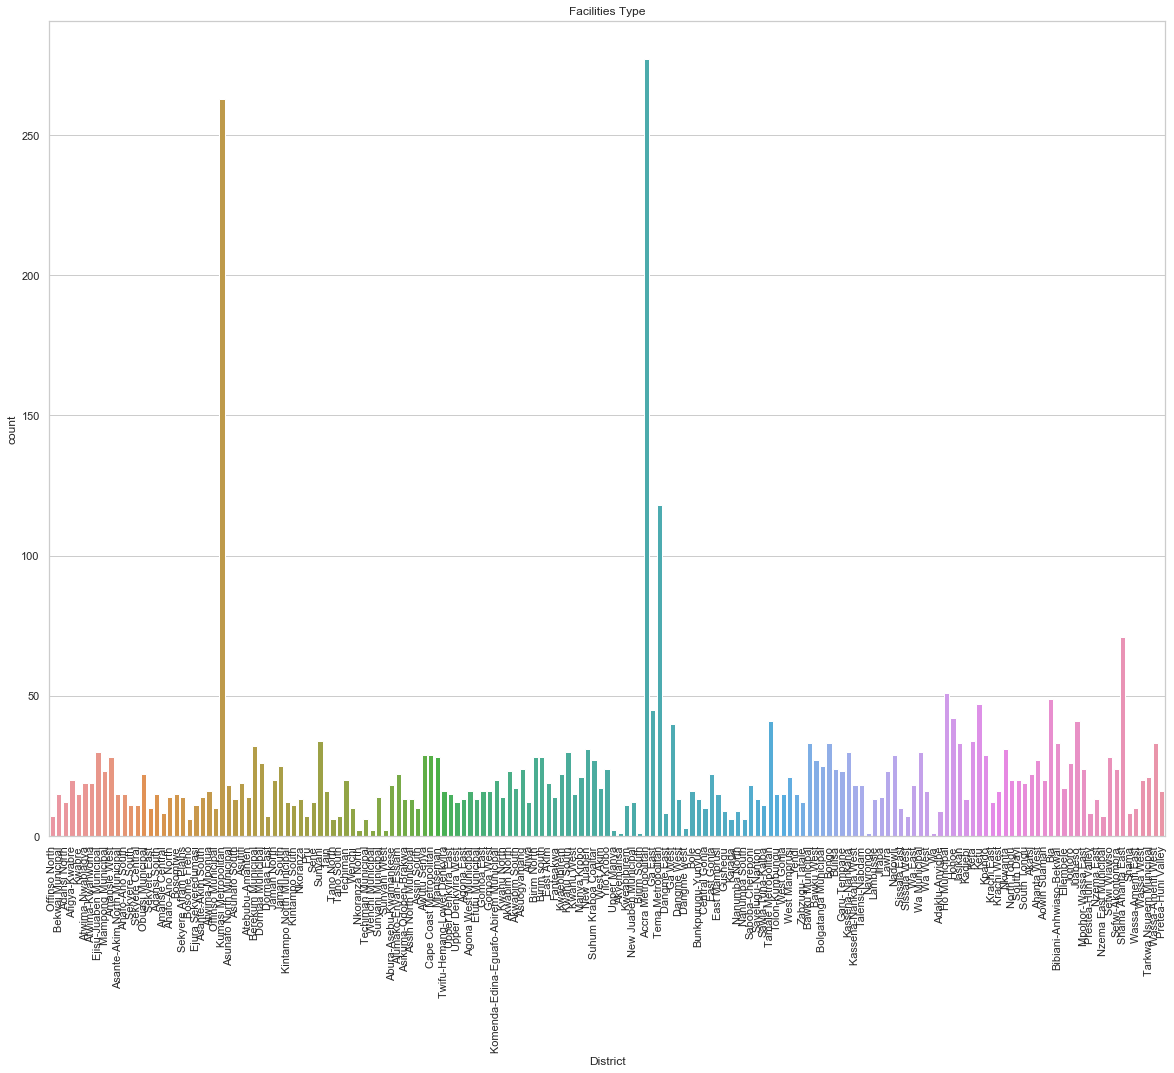

In [31]:
plt.figure(figsize=(20, 15))
p = sns.countplot(g_df['District'])
# p.set_xticklabels(rotation=30)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.title('Facilities Type')

# Region and Ownership

In [101]:
ownership_region = g_df.groupby(['Region', 'Ownership']).count()['Type'].unstack()
ownership_region=ownership_region.fillna(0)

Text(0.5, 1, 'Region / Ownership')

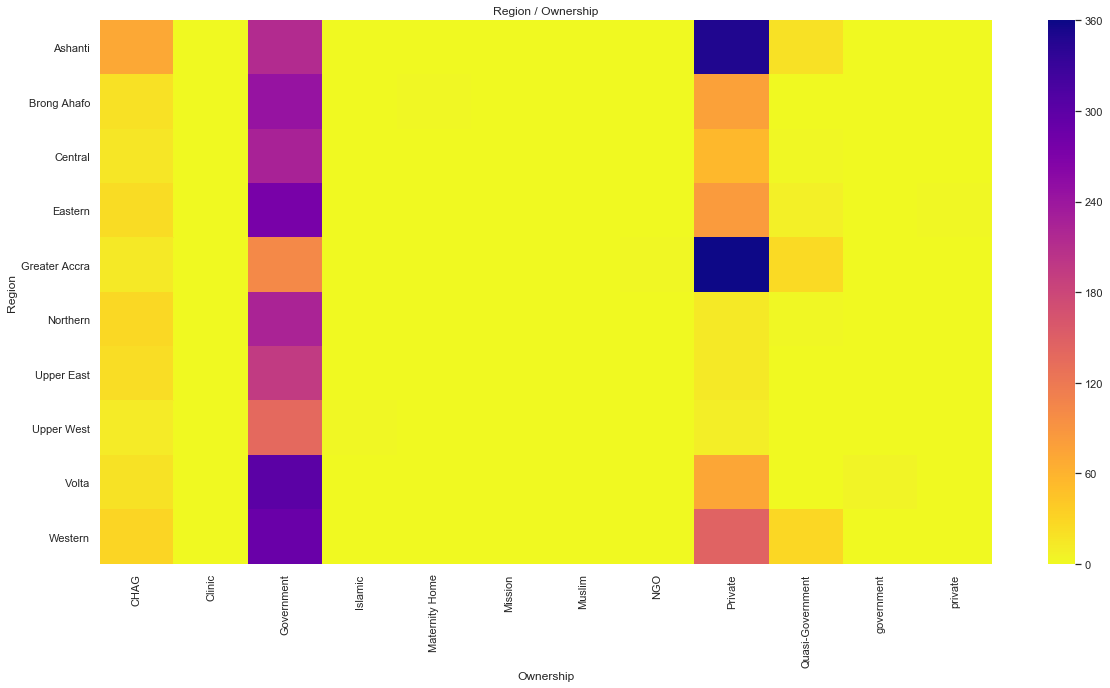

In [102]:
sns.heatmap(ownership_region, cmap='plasma_r')
plt.title("Region / Ownership")

In [65]:
facilities_town= g_df.groupby(['District','Town'])['Type'].count().reset_index()

# Town which has more than 5 health facilities

In [82]:
towns =facilities_town[facilities_town.Type > 5]

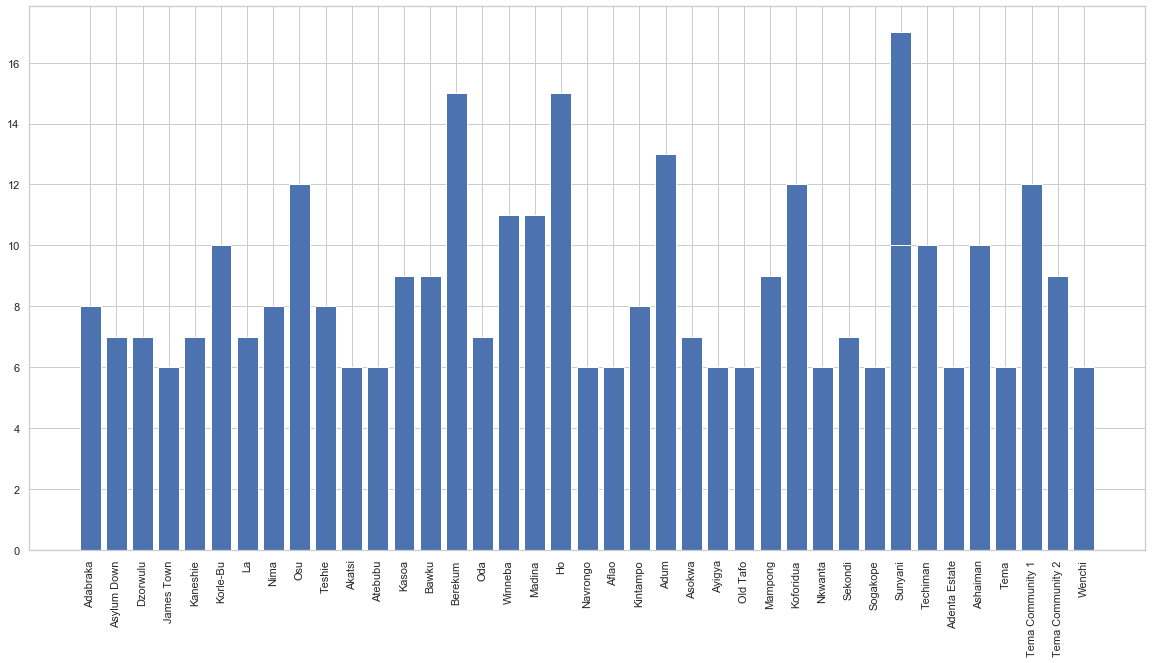

In [67]:
plt.bar(towns.Town, towns.Type)
plt.xticks(rotation='vertical')
plt.show()

- Following statstics shows that only less then 2 percent of the two contains more health facilities, and may be those are very big towns or something, 
- more than 80 percent of the towns have less very less or no health facilities at all

# Town which has more than 5 health facilities

In [87]:
hf_5= (len(towns) / len(facilities_town.Town))
print("Town which has more than 5 health facilities: "+"{:.3%}".format(hf_5));

Town which has more than 5 health facilities: 1.536%


# Town which has more than 2 and 5 health facilities

In [89]:
towns2_5 =facilities_town[(facilities_town.Type > 1) & (facilities_town.Type < 5)]
hf_2_5= (len(towns2_5) / len(facilities_town.Town))
print("Town which has more than 2 and 5 health facilities: "+"{:.3%}".format(hf_2_5));

Town which has more than 2 and 5 health facilities: 15.547%


# Town which has less than 2 health facilities

In [90]:
towns_with_lessFac =facilities_town[(facilities_town.Type  < 2)]
hf_lessFac = (len(towns_with_lessFac) / len(facilities_town.Town))
print("Town which has less than 2 health facilities: "+"{:.3%}".format(hf_lessFac));

Town which has less than 2 health facilities: 81.804%


# Locations

In [129]:
m = folium.Map(location=[7.9465, 1.0232], zoom_start=8, control_scale = False, attr='USGS style')
m.add_children(plugins.HeatMap(zip(g_df.Latitude, g_df.Longitude), radius = 10))
m

In [128]:
m.save('Data.html')

In [131]:
ppf.ProfileReport(g_df)